In [33]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [34]:
dataset=pd.read_csv('winequality-red.csv', delimiter=';')

In [35]:
dataset.head()
dataset.info()
dataset.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [36]:
#sns.pairplot(dataset)

<Axes: >

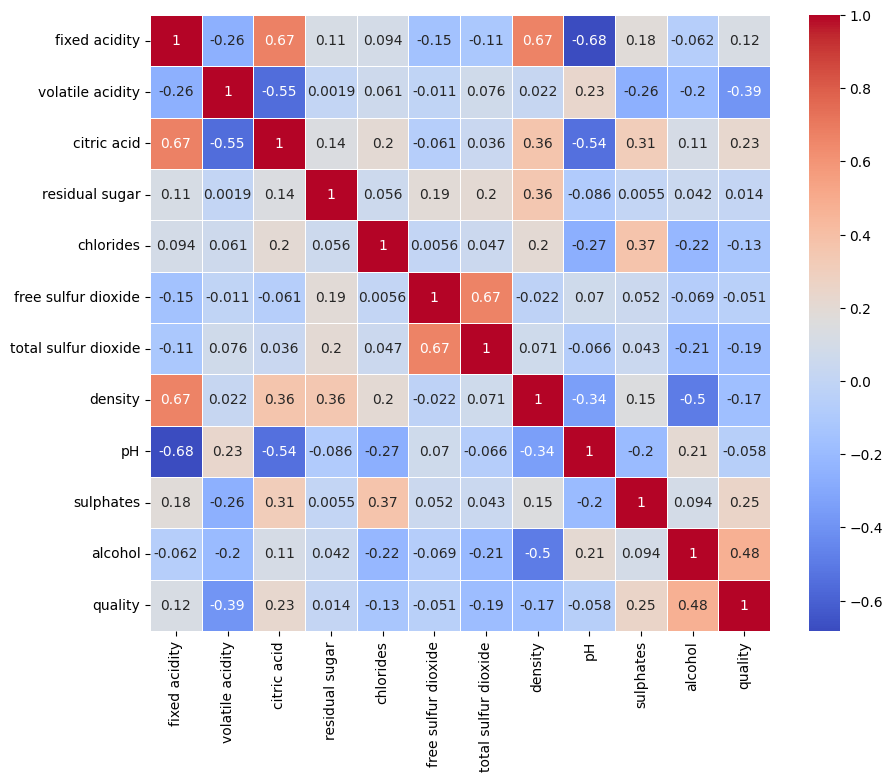

In [37]:
corr_matrix = dataset.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=.5)

In [38]:
columns_indices_to_drop = [3, 8, 11]
dataset= dataset.drop(dataset.columns[columns_indices_to_drop], axis=1)

In [39]:
x=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

In [40]:
from sklearn.model_selection import train_test_split as tts 
x_train,x_test,y_train,y_test=tts(x,y,test_size=0.2,random_state=54)

In [41]:
from sklearn.preprocessing import StandardScaler as ss
sc=ss()
x_train[:,:]=sc.fit_transform(x_train[:,:])
x_test[:,:]=sc.transform(x_test[:,:])
y_train=sc.fit_transform(y_train[:].reshape(-1,1))
y_test=sc.fit_transform(y_test[:].reshape(-1,1))

In [42]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
regressor = SVR()
# Reduced range of values for hyperparameters
param_grid = {'C': [0.1, 1], 'gamma': [0.1, 1], 'kernel': ['linear', 'rbf','sigmoid','poly']}
grid = GridSearchCV(estimator=regressor, param_grid=param_grid, scoring='neg_mean_squared_error', cv=3, verbose=1, n_jobs=-1)
grid.fit(x_train, y_train.ravel())


Fitting 3 folds for each of 16 candidates, totalling 48 fits


GridSearchCV(cv=3, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.1, 1], 'gamma': [0.1, 1],
                         'kernel': ['linear', 'rbf', 'sigmoid', 'poly']},
             scoring='neg_mean_squared_error', verbose=1)

In [43]:
# Printing the best hyperparameters and the best score
print("Best hyperparameters: ", grid.best_params_)
print("Best score: ", -grid.best_score_)

Best hyperparameters:  {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Best score:  0.3994850276514053


In [44]:
y_pred = grid.predict(x_test)
np.set_printoptions(precision=2)
y_pred=sc.inverse_transform(y_pred.reshape(-1,1))
y_test=sc.inverse_transform(y_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[10.03  9.8 ]
 [ 9.57  9.6 ]
 [ 9.99 10.  ]
 [10.28  9.5 ]
 [ 9.91 10.2 ]
 [10.25 11.  ]
 [ 9.86  9.7 ]
 [ 9.6   9.5 ]
 [10.64 10.6 ]
 [11.07 10.3 ]
 [10.68  9.9 ]
 [10.    9.6 ]
 [11.02 11.1 ]
 [12.34 11.1 ]
 [10.08 12.7 ]
 [ 9.61  9.3 ]
 [11.93 11.2 ]
 [10.5   9.7 ]
 [10.46 11.2 ]
 [11.43 11.6 ]
 [12.16 12.1 ]
 [ 9.52 10.1 ]
 [11.71 11.1 ]
 [11.44 11.1 ]
 [ 9.87  9.6 ]
 [10.5  11.2 ]
 [ 9.35  9.4 ]
 [13.65 13.57]
 [11.79 11.6 ]
 [ 9.93  9.8 ]
 [11.82 12.8 ]
 [11.11 11.7 ]
 [10.25 10.8 ]
 [ 9.89  9.2 ]
 [13.59 14.  ]
 [12.07 12.3 ]
 [ 9.75 10.4 ]
 [10.73 10.6 ]
 [ 9.75 10.  ]
 [ 9.64 10.1 ]
 [10.3  10.6 ]
 [10.74 11.  ]
 [ 9.7   9.9 ]
 [10.02 11.7 ]
 [10.21  9.8 ]
 [ 9.33  9.3 ]
 [10.74 10.1 ]
 [11.18 10.  ]
 [ 9.97  9.2 ]
 [ 9.27  9.1 ]
 [ 9.81  9.4 ]
 [10.31 10.  ]
 [10.05 10.9 ]
 [11.5  11.3 ]
 [11.64 11.2 ]
 [11.13 11.1 ]
 [ 9.7   9.5 ]
 [10.13  9.2 ]
 [ 9.92  9.5 ]
 [ 9.88 11.3 ]
 [ 9.78 10.8 ]
 [10.48 10.5 ]
 [ 9.15  9.4 ]
 [ 9.73  9.7 ]
 [ 9.31  9.4 ]
 [ 9.98  9.2 ]
 [10.73 10

In [45]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")

Mean Squared Error: 0.35795445235785045
R2 Score: 0.7041586726162188


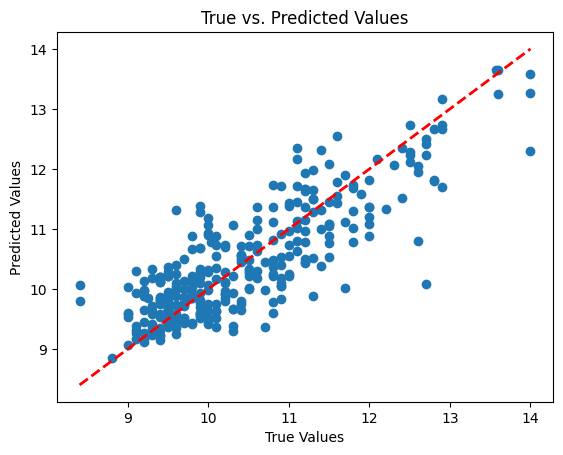

In [46]:
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs. Predicted Values')
plt.show()

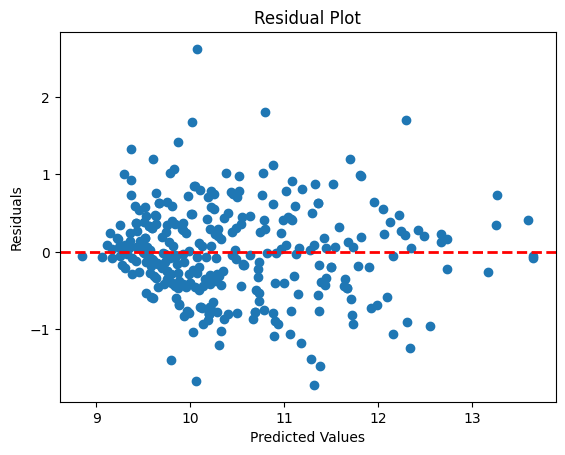

In [47]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

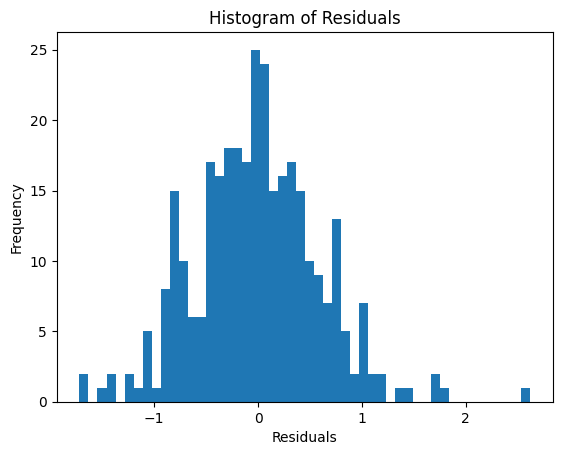

In [48]:
plt.hist(residuals, bins=50)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()